In [1]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

d:\ProgramData\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading in original CSV file
original_df = pd.read_csv("../Project4/healthcare-dataset-stroke-data.csv")

#showing first 10 rows of data
original_df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# printing columns for the dataframe
print(original_df.columns)

# printing the data type for each colum
print(original_df.info())

#cleaning dataframe with dropping NA
original_df=original_df.dropna()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3)

In [4]:
# create a copy of the original dataframe 
stroke_df=original_df.copy()
stroke_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
# total percentage of stroke among all patients on record
total_number_patient=stroke_df["id"].count()
total_number_stroke=stroke_df["stroke"].sum()
stroke_percentage=total_number_stroke/total_number_patient*100
print("there are total "+ str(total_number_stroke) + " people had stroke")
print("there are " + str(round(stroke_percentage,2)) + " percent people had stroke among the patient list")

there are total 209 people had stroke
there are 4.26 percent people had stroke among the patient list


In [57]:
#undering standing the relationship between gender and stroke
gender_count=stroke_df.groupby(["gender"]).count()["id"]
gender_stroke_count=stroke_df.groupby(["gender"]).sum()["stroke"]
gender_stroke_df=pd.DataFrame({"count":gender_count,"stroke_count":gender_stroke_count,"stroke_percentage":gender_stroke_count/gender_count*100})

gender_stroke_df.reset_index(inplace=True)
gender_stroke_df

,gender,count,stroke_count,stroke_percentage
0,Female,2897,120,4.142216
1,Male,2011,89,4.425659
2,Other,1,0,0.000000


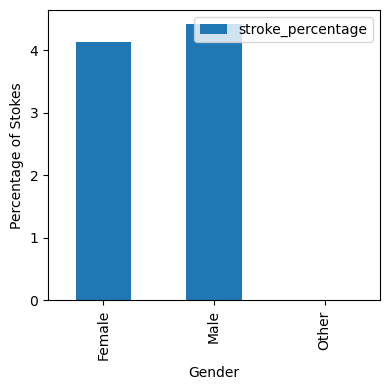

In [60]:
count_chart = gender_stroke_df.plot( x='gender', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("Gender")
count_chart.set_ylabel("Percentage of Stokes")
plt.tight_layout()
plt.show()

In [7]:
#undering standing the relationship between age and stroke
bin_age=[0,20,40,60,80,100,200]
age_labels = ["0 to 20", "21 to 40", "41 to 60", "61 to 80", "81 to 100", "100+"]
stroke_df["age_group"]=pd.cut(stroke_df["age"], bin_age, labels=age_labels)

age_count=stroke_df.groupby(["age_group"]).count()["id"]
age_stroke_count=stroke_df.groupby(["age_group"]).sum()["stroke"]
age_stroke_df=pd.DataFrame({"count":age_count,"stroke_count":age_stroke_count,"stroke_percentage":age_stroke_count/age_count*100})

age_stroke_df.reset_index(inplace=True)
age_stroke_df

,age_group,count,stroke_count,stroke_percentage
0,0 to 20,1000,1,0.100000
1,21 to 40,1184,5,0.422297
2,41 to 60,1508,57,3.779841
3,61 to 80,1102,123,11.161525
4,81 to 100,115,23,20.000000
5,100+,0,0,NaN


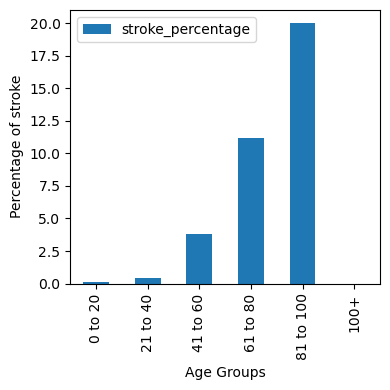

In [62]:
count_chart = age_stroke_df.plot( x='age_group', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("Age Groups")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [8]:
#undering standing the relationship between hypertension and stroke
hypertension_count=stroke_df.groupby(["hypertension"]).count()["id"]
hypertension_stroke_count=stroke_df.groupby(["hypertension"]).sum()["stroke"]
hypertension_stroke_df=pd.DataFrame({"count":hypertension_count,"stroke_count":hypertension_stroke_count,"stroke_percentage":hypertension_stroke_count/hypertension_count*100})

hypertension_stroke_df.reset_index(inplace=True)
hypertension_stroke_df

,hypertension,count,stroke_count,stroke_percentage
0,0,4458,149,3.342306
1,1,451,60,13.303769


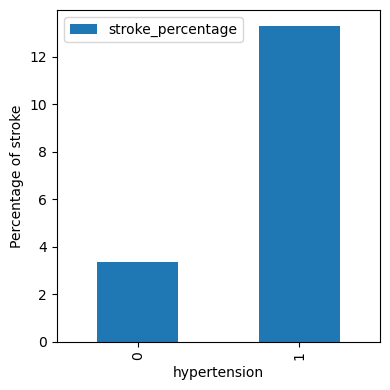

In [63]:
count_chart = hypertension_stroke_df.plot( x='hypertension', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("hypertension")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [9]:
#undering standing the relationship between heart_disease and stroke
heart_disease_count=stroke_df.groupby(["heart_disease"]).count()["id"]
heart_disease_stroke_count=stroke_df.groupby(["heart_disease"]).sum()["stroke"]
heart_disease_stroke_df=pd.DataFrame({"count":heart_disease_count,"stroke_count":heart_disease_stroke_count,"stroke_percentage":heart_disease_stroke_count/heart_disease_count*100})

heart_disease_stroke_df.reset_index(inplace=True)
heart_disease_stroke_df

,heart_disease,count,stroke_count,stroke_percentage
0,0,4666,169,3.621946
1,1,243,40,16.460905


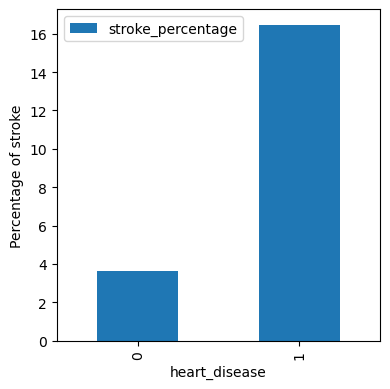

In [64]:
count_chart = heart_disease_stroke_df.plot( x='heart_disease', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("heart_disease")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [10]:
#undering standing the relationship between ever_married and stroke
ever_married_count=stroke_df.groupby(["ever_married"]).count()["id"]
ever_married_stroke_count=stroke_df.groupby(["ever_married"]).sum()["stroke"]
ever_married_stroke_df=pd.DataFrame({"count":ever_married_count,"stroke_count":ever_married_stroke_count,"stroke_percentage":ever_married_stroke_count/ever_married_count*100})

ever_married_stroke_df.reset_index(inplace=True)
ever_married_stroke_df

,ever_married,count,stroke_count,stroke_percentage
0,No,1705,23,1.348974
1,Yes,3204,186,5.805243


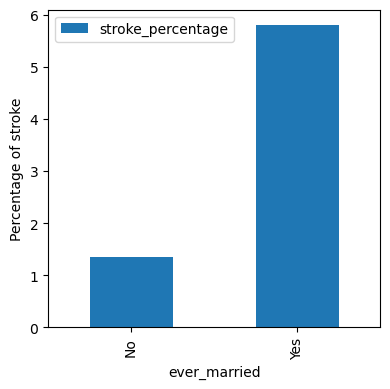

In [65]:
count_chart = ever_married_stroke_df.plot( x='ever_married', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("ever_married")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [11]:
#undering standing the relationship between work_type and stroke
work_type_count=stroke_df.groupby(["work_type"]).count()["id"]
work_type_stroke_count=stroke_df.groupby(["work_type"]).sum()["stroke"]
work_type_stroke_df=pd.DataFrame({"count":work_type_count,"stroke_count":work_type_stroke_count,"stroke_percentage":work_type_stroke_count/work_type_count*100})

work_type_stroke_df.reset_index(inplace=True)
work_type_stroke_df

,work_type,count,stroke_count,stroke_percentage
0,Govt_job,630,28,4.444444
1,Never_worked,22,0,0.000000
2,Private,2811,127,4.517965
3,Self-employed,775,53,6.838710
4,children,671,1,0.149031


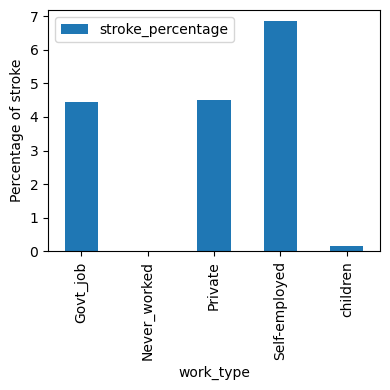

In [66]:
count_chart = work_type_stroke_df.plot( x='work_type', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("work_type")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [12]:
#undering standing the relationship between Residence_type and stroke
Residence_type_count=stroke_df.groupby(["Residence_type"]).count()["id"]
Residence_type_stroke_count=stroke_df.groupby(["Residence_type"]).sum()["stroke"]
Residence_type_stroke_df=pd.DataFrame({"count":Residence_type_count,"stroke_count":Residence_type_stroke_count,"stroke_percentage":Residence_type_stroke_count/Residence_type_count*100})

Residence_type_stroke_df.reset_index(inplace=True)
Residence_type_stroke_df

,Residence_type,count,stroke_count,stroke_percentage
0,Rural,2419,100,4.13394
1,Urban,2490,109,4.37751


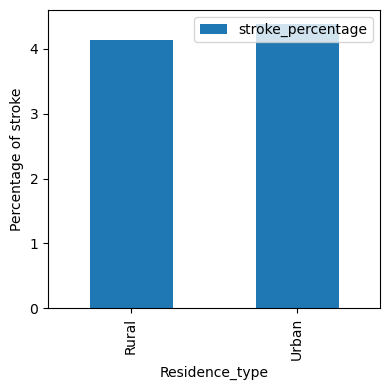

In [67]:
count_chart = Residence_type_stroke_df.plot( x='Residence_type', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("Residence_type")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [13]:
# #undering standing the relationship between avg_glucose_level and stroke
bin_avg_glucose_level=[0,100,200,300]
avg_glucose_level_labels = ["0 to 100", "101 to 200", "201 to 300"]
stroke_df["avg_glucose_level_group"]=pd.cut(stroke_df["avg_glucose_level"], bin_avg_glucose_level, labels=avg_glucose_level_labels)

avg_glucose_level_count=stroke_df.groupby(["avg_glucose_level_group"]).count()["id"]
avg_glucose_level_stroke_count=stroke_df.groupby(["avg_glucose_level_group"]).sum()["stroke"]
avg_glucose_level_stroke_df=pd.DataFrame({"count":avg_glucose_level_count,"stroke_count":avg_glucose_level_stroke_count,"stroke_percentage":avg_glucose_level_stroke_count/avg_glucose_level_count*100})

avg_glucose_level_stroke_df.reset_index(inplace=True)
avg_glucose_level_stroke_df

,avg_glucose_level_group,count,stroke_count,stroke_percentage
0,0 to 100,3030,93,3.069307
1,101 to 200,1488,67,4.502688
2,201 to 300,391,49,12.531969


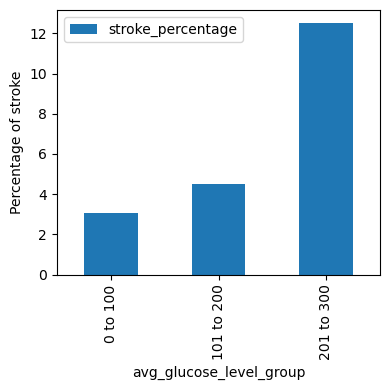

In [69]:
count_chart = avg_glucose_level_stroke_df.plot( x='avg_glucose_level_group', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("avg_glucose_level_group")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [14]:
# #undering standing the relationship between bmi and stroke
bin_bmi=[0,20,40,60,80,100]
bmi_labels = ["0 to 20", "21 to 40", "41 to 60", "61 to 80","80+"]
stroke_df["bmi_group"]=pd.cut(stroke_df["bmi"], bin_bmi, labels=bmi_labels)

bmi_count=stroke_df.groupby(["bmi_group"]).count()["id"]
bmi_stroke_count=stroke_df.groupby(["bmi_group"]).sum()["stroke"]
bmi_stroke_df=pd.DataFrame({"count":bmi_count,"stroke_count":bmi_stroke_count,"stroke_percentage":bmi_stroke_count/bmi_count*100})

bmi_stroke_df.reset_index(inplace=True)
bmi_stroke_df

,bmi_group,count,stroke_count,stroke_percentage
0,0 to 20,537,3,0.558659
1,21 to 40,3964,188,4.742684
2,41 to 60,395,18,4.556962
3,61 to 80,11,0,0.000000
4,80+,2,0,0.000000


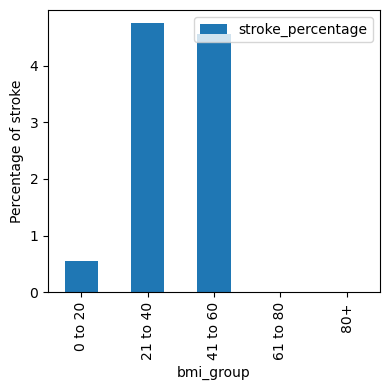

In [70]:
count_chart = bmi_stroke_df.plot( x='bmi_group', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("bmi_group")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

In [15]:
#undering standing the relationship between smoking_status and stroke
smoking_status_count=stroke_df.groupby(["smoking_status"]).count()["id"]
smoking_status_stroke_count=stroke_df.groupby(["smoking_status"]).sum()["stroke"]
smoking_status_stroke_df=pd.DataFrame({"count":smoking_status_count,"stroke_count":smoking_status_stroke_count,"stroke_percentage":smoking_status_stroke_count/smoking_status_count*100})

smoking_status_stroke_df.reset_index(inplace=True)
smoking_status_stroke_df


,smoking_status,count,stroke_count,stroke_percentage
0,Unknown,1483,29,1.955496
1,formerly smoked,837,57,6.810036
2,never smoked,1852,84,4.535637
3,smokes,737,39,5.291723


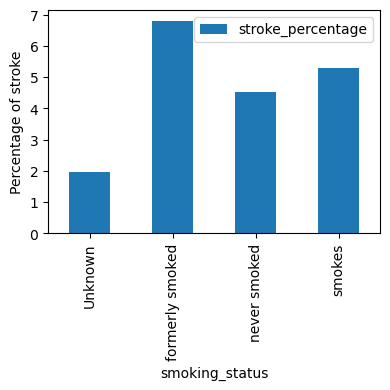

In [71]:
count_chart = smoking_status_stroke_df.plot( x='smoking_status', y='stroke_percentage', kind='bar', figsize=(4,4))
count_chart.set_xlabel("smoking_status")
count_chart.set_ylabel("Percentage of stroke")
plt.tight_layout()
plt.show()

## organizing Dataframe to fit models


In [25]:
#drop the columns that are not impacting if stroke much
stroke_model_df = stroke_df.drop(columns=["id", "gender","work_type","Residence_type","bmi","smoking_status","age_group","avg_glucose_level_group","bmi_group"])
stroke_model_df 

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,67.0,0,1,Yes,228.69,1
2,80.0,0,1,Yes,105.92,1
3,49.0,0,0,Yes,171.23,1
4,79.0,1,0,Yes,174.12,1
5,81.0,0,0,Yes,186.21,1
...,...,...,...,...,...,...
5104,13.0,0,0,No,103.08,0
5106,81.0,0,0,Yes,125.20,0
5107,35.0,0,0,Yes,82.99,0
5108,51.0,0,0,Yes,166.29,0


In [26]:
# updating string values to int/float value in the dataframe
stroke_model_df['ever_married_convered']=stroke_df['ever_married'].map({'Yes':1,'No':0})
stroke_model_df=stroke_model_df.drop(columns=['ever_married'])
stroke_model_df.tail()

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_convered
5104,13.0,0,0,103.08,0,0
5106,81.0,0,0,125.20,0,1
5107,35.0,0,0,82.99,0,1
5108,51.0,0,0,166.29,0,1
5109,44.0,0,0,85.28,0,1


In [27]:
# Separate the data into labels and features
# Separate the y variable, the labels
# Separate the X variable, the features
y = stroke_model_df["stroke"]
X = stroke_model_df.copy()
X.drop("stroke", axis=1, inplace=True)
# Review the y variable Series
print(f"Labels: {y[:10]}")

Labels: 0     1
2     1
3     1
4     1
5     1
6     1
7     1
9     1
10    1
11    1
Name: stroke, dtype: int64


## Logistics Regression Model

In [28]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [30]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

In [31]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9527687296416938

In [32]:
# Generate a confusion matrix for the model
confusion_matrix(predictions,y_test)

array([[1170,   58],
       [   0,    0]], dtype=int64)

In [33]:
# Print the classification report for the model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1228
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1228
   macro avg       0.50      0.48      0.49      1228
weighted avg       1.00      0.95      0.98      1228



d:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Desicion Tree Model

In [34]:
# Define the features set by copying the original DataFrame and dropping the 'stroke' column.
X = stroke_model_df.copy()
X.drop("stroke", axis=1, inplace=True)
# Define the target vector by extracting the 'stroke' column from the original DataFrame.
y = stroke_model_df["stroke"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [35]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
# Create an instance of the StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the StandardScaler to the training data.
X_scaler = scaler.fit(X_train)

In [37]:
# Use the fitted scaler to transform the training and testing data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [38]:
# Initialize a decision tree classifier.
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [39]:
# Fit the decision tree classifier to the scaled training data.
model = model.fit(X_train_scaled, y_train)

In [40]:
# Use the trained decision tree model to make predictions on the scaled testing data.
predictions = model.predict(X_test_scaled)

In [41]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9210097719869706

In [42]:
# Generate a confusion matrix for the model
confusion_matrix(predictions,y_test)

array([[1124,   56],
       [  41,    7]], dtype=int64)

In [43]:
# Print the classification report for the model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1180
           1       0.11      0.15      0.13        48

    accuracy                           0.92      1228
   macro avg       0.54      0.55      0.54      1228
weighted avg       0.93      0.92      0.93      1228



## Ramdom Forest Model

In [44]:
# Define features set
X = stroke_model_df.copy()
X.drop("stroke", axis=1, inplace=True)
y = stroke_model_df["stroke"].ravel()
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [45]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [46]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [47]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [50]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [51]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9413680781758957

In [52]:
# Generate a confusion matrix for the model
confusion_matrix(predictions,y_test)

array([[1152,   59],
       [  13,    4]], dtype=int64)

In [53]:
# Print the classification report for the model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1211
           1       0.06      0.24      0.10        17

    accuracy                           0.94      1228
   macro avg       0.53      0.59      0.53      1228
weighted avg       0.98      0.94      0.96      1228

